In [ ]:
from pandas.core.computation.check import NUMEXPR_INSTALLED

In [ ]:
import json
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
with open('/content/gdrive/MyDrive/Colab Notebooks/propaganda/dataset/task2_train.json', 'r',encoding='utf-8') as f:
    data = json.load(f)
df = pd.DataFrame(data)



In [ ]:
df.head()

,id,text,labels
0,1358824915483435012,"#بي_بي_سي_ترندينغ: النساء ""تثرثر كثيرا"" رئيس أ...",[]
1,1389927866356412416,"""ده مش معتقل ده أحسن من اللوكاندة"".. جدل وسخري...","[{'start': 1, 'end': 33, 'technique': 'Exagger..."
2,1364082975428677632,الرجل الذي كان من فراغ https://t.co/2bnHiRqGRQ,[]
3,1391667689656102914,RT @AJABreaking: عاجل | حركة حماس: ما يجري في ...,"[{'start': 60, 'end': 72, 'technique': 'Loaded..."
4,1389360446440972289,"انطلاق أسبوع المرور العربي تحت شعار: ""الحوادث ...","[{'start': 38, 'end': 72, 'technique': 'Slogan..."


In [ ]:
# Use the keep parameter to consider only the first instance of a duplicate row to be unique
bool_series = df.duplicated(subset = 'text')
print('Boolean series:')
print(bool_series)
print('\n')
print('DataFrame after keeping only the first instance of the duplicate rows:')

# The `~` sign is used for negation. It changes the boolean value True to False and False to True.

df[~bool_series]

Boolean series:
0      False
1      False
2      False
3      False
4      False
       ...  
499    False
500    False
501    False
502    False
503    False
Length: 504, dtype: bool


DataFrame after keeping only the first instance of the duplicate rows:


,id,text,labels
0,1358824915483435012,"#بي_بي_سي_ترندينغ: النساء ""تثرثر كثيرا"" رئيس أ...",[]
1,1389927866356412416,"""ده مش معتقل ده أحسن من اللوكاندة"".. جدل وسخري...","[{'start': 1, 'end': 33, 'technique': 'Exagger..."
2,1364082975428677632,الرجل الذي كان من فراغ https://t.co/2bnHiRqGRQ,[]
3,1391667689656102914,RT @AJABreaking: عاجل | حركة حماس: ما يجري في ...,"[{'start': 60, 'end': 72, 'technique': 'Loaded..."
4,1389360446440972289,"انطلاق أسبوع المرور العربي تحت شعار: ""الحوادث ...","[{'start': 38, 'end': 72, 'technique': 'Slogan..."
...,...,...,...
499,1394708550304288772,رئيس المجموعة العربية: مجلس الأمن غير قادر حتى...,"[{'start': 23, 'end': 119, 'technique': 'Smear..."
500,866965157464952832,مقال رأي: النهضة ومنظومة بن علي وجهان لعملة وا...,"[{'start': 10, 'end': 49, 'technique': 'Smears..."
501,1388010230991134720,من أفغانستان إلى العراق إلى ثورة يناير كيف زيف...,"[{'start': 43, 'end': 47, 'technique': 'Loaded..."
502,1392038066584489984,الأمين العام للجامعة العربية: إسرائيل مسؤولة ع...,"[{'start': 49, 'end': 63, 'technique': 'Loaded..."


In [ ]:
df['full_text'] = df['text']

In [ ]:
df.drop('text', inplace=True, axis=1)

In [ ]:
df.shape

(504, 3)

In [ ]:
print('There are {} rows and {} columns in train'.format(df.shape[0],df.shape[1]))

There are 504 rows and 3 columns in train


In [ ]:
print(df.isna().sum())

id           0
labels       0
full_text    0
dtype: int64


# flating list of dic in (labels) to coulms

In [ ]:
result = []
dec = {}
for idx, row in df.iterrows():
    if (row['labels']):
        for dct in row['labels']:
            dct['id'] = row['id']
            dct['full_text'] = row['full_text']
            result.append(dct)
    else:
        dec = {}
        dec['start'] = 0
        dec['end'] = 0
        dec['technique'] = 'no technique'
        dec['text'] = ''
        dec['full_text'] = row['full_text']
        dec['id'] = row['id']
        
        result.append(dec) 
   
       


In [ ]:
new_df = pd.DataFrame(result)

In [ ]:
new_df

,start,end,technique,text,full_text,id,text_fragment
0,0,0,no technique,,"#بي_بي_سي_ترندينغ: النساء ""تثرثر كثيرا"" رئيس أ...",1358824915483435012,NaN
1,1,33,Exaggeration/Minimisation,ده مش معتقل ده أحسن من اللوكاندة,"""ده مش معتقل ده أحسن من اللوكاندة"".. جدل وسخري...",1389927866356412416,NaN
2,37,86,Smears,جدل وسخرية من زيارات تنظمها وزارة الداخلية للسجون,"""ده مش معتقل ده أحسن من اللوكاندة"".. جدل وسخري...",1389927866356412416,NaN
3,0,0,no technique,,الرجل الذي كان من فراغ https://t.co/2bnHiRqGRQ,1364082975428677632,NaN
4,60,72,Loaded Language,مجزرة حقيقية,RT @AJABreaking: عاجل | حركة حماس: ما يجري في ...,1391667689656102914,NaN
...,...,...,...,...,...,...,...
1115,43,47,Loaded Language,زيفت,من أفغانستان إلى العراق إلى ثورة يناير كيف زيف...,1388010230991134720,NaN
1116,0,89,Smears,من أفغانستان إلى العراق إلى ثورة يناير كيف زيف...,من أفغانستان إلى العراق إلى ثورة يناير كيف زيف...,1388010230991134720,NaN
1117,49,63,Loaded Language,التصعيد الخطير,الأمين العام للجامعة العربية: إسرائيل مسؤولة ع...,1392038066584489984,NaN
1118,30,73,Smears,"إسرائيل مسؤولة عن ""التصعيد الخطير"" في القدس",الأمين العام للجامعة العربية: إسرائيل مسؤولة ع...,1392038066584489984,NaN


In [ ]:
print(new_df.isna().sum())

start              0
end                0
technique          0
text             428
full_text          0
id                 0
text_fragment    692
dtype: int64


In [ ]:
new_df["text"] = new_df["text"].fillna(new_df["text_fragment"])

In [ ]:
print(new_df.isna().sum())

start              0
end                0
technique          0
text               0
full_text          0
id                 0
text_fragment    692
dtype: int64


In [ ]:
new_df.drop('text_fragment', inplace=True, axis=1)

In [ ]:
print(new_df.isna().sum())

start        0
end          0
technique    0
text         0
full_text    0
id           0
dtype: int64


# Data cleaning and analisys

In [ ]:
pip install pyarabic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 KB 6.1 MB/s eta 0:00:00


In [ ]:
new_df.shape

(1120, 6)

In [ ]:
print('There are {} rows and {} columns in train'.format(new_df.shape[0],new_df.shape[1]))

There are 1120 rows and 6 columns in train


In [ ]:
len(new_df)

1120

In [ ]:
print(new_df.isna().sum())


start        0
end          0
technique    0
text         0
full_text    0
id           0
dtype: int64


In [ ]:
import pyarabic.araby as araby
import re

def clean_text(text):
    text = araby.strip_tatweel(text) # 
    text = araby.strip_tashkeel(text) #حذف الحركات كلها بما فيها الشدةحذف التطويل
    text = re.sub('([@A-Za-z0-9_ـــــــــــــ]+)|[^\w\s]|#|http\S+', ' ', text) # remove non arabic languge
    text = re.sub(' +', ' ',text) # remove more than one space
    text = text.strip()
        
    return text
    

In [ ]:
new_df['full_text'] = new_df['full_text'].apply(clean_text)
new_df['text'] = new_df['text'].apply(clean_text)

In [ ]:
#print(new_df.iloc['id']['1392812816961314816'])
c= new_df.loc[new_df.id == '1392812816961314816','full_text'].tolist()
c

['عاجل القناة العبرية انفجار طائرة دون طيار مفخخة في سماء إحدى مستوطنات غلاف غزة',
 'عاجل القناة العبرية انفجار طائرة دون طيار مفخخة في سماء إحدى مستوطنات غلاف غزة',
 'عاجل القناة العبرية انفجار طائرة دون طيار مفخخة في سماء إحدى مستوطنات غلاف غزة']

In [ ]:
new_df['technique'].value_counts()

Loaded Language                                  446
Name calling/Labeling                            244
no technique                                      95
Smears                                            85
Appeal to fear/prejudice                          48
Slogans                                           44
Exaggeration/Minimisation                         44
Doubt                                             29
Glittering generalities (Virtue)                  25
Appeal to authority                               21
Obfuscation, Intentional vagueness, Confusion      9
Repetition                                         9
Thought-terminating cliché                         6
Flag-waving                                        5
Causal Oversimplification                          4
Whataboutism                                       3
Black-and-white Fallacy/Dictatorship               2
Presenting Irrelevant Data (Red Herring)           1
Name: technique, dtype: int64

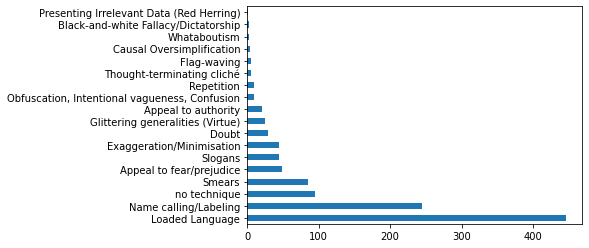

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
x=new_df['technique'].value_counts().plot(kind='barh')

In [ ]:
bool_series = new_df.duplicated()
print('Boolean series:')
print(bool_series)
print('\n')
print('DataFrame after removing duplicates found in the Name column:')
new_df[~bool_series].shape

Boolean series:
0       False
1       False
2       False
3       False
4       False
        ...  
1115    False
1116    False
1117    False
1118    False
1119    False
Length: 1120, dtype: bool


DataFrame after removing duplicates found in the Name column:


(1120, 6)

In [ ]:
for i in range(len(new_df)):
  tech = new_df.loc[i, "technique"]
  if(tech=='no technique'):
    new_df.loc[i,"start_new"] = 0
    new_df.loc[i,"end_new"] = 0
  else:
    full_text = new_df.loc[i,"full_text"]
    text = new_df.loc[i,"text"]
    start = full_text.find(text)
    end = start + len(text)
    new_df.loc[i,"start_new"]= start  
    new_df.loc[i,"end_new"] = end 

new_df 

,start,end,technique,text,full_text,id,start_new,end_new
0,0,0,no technique,,بي بي سي ترندينغ النساء تثرثر كثيرا رئيس أولمب...,1358824915483435012,0.0,0.0
1,1,33,Exaggeration/Minimisation,ده مش معتقل ده أحسن من اللوكاندة,ده مش معتقل ده أحسن من اللوكاندة جدل وسخرية من...,1389927866356412416,0.0,32.0
2,37,86,Smears,جدل وسخرية من زيارات تنظمها وزارة الداخلية للسجون,ده مش معتقل ده أحسن من اللوكاندة جدل وسخرية من...,1389927866356412416,33.0,82.0
3,0,0,no technique,,الرجل الذي كان من فراغ,1364082975428677632,0.0,0.0
4,60,72,Loaded Language,مجزرة حقيقية,عاجل حركة حماس ما يجري في المسجد الأقصى مجزرة ...,1391667689656102914,40.0,52.0
...,...,...,...,...,...,...,...,...
1115,43,47,Loaded Language,زيفت,من أفغانستان إلى العراق إلى ثورة يناير كيف زيف...,1388010230991134720,43.0,47.0
1116,0,89,Smears,من أفغانستان إلى العراق إلى ثورة يناير كيف زيف...,من أفغانستان إلى العراق إلى ثورة يناير كيف زيف...,1388010230991134720,0.0,86.0
1117,49,63,Loaded Language,التصعيد الخطير,الأمين العام للجامعة العربية إسرائيل مسؤولة عن...,1392038066584489984,47.0,61.0
1118,30,73,Smears,إسرائيل مسؤولة عن التصعيد الخطير في القدس,الأمين العام للجامعة العربية إسرائيل مسؤولة عن...,1392038066584489984,29.0,70.0


In [ ]:
unique_list = new_df.technique.unique()
unique_list

array(['no technique', 'Exaggeration/Minimisation', 'Smears',
       'Loaded Language', 'Appeal to fear/prejudice',
       'Name calling/Labeling', 'Slogans', 'Repetition', 'Doubt',
       'Obfuscation, Intentional vagueness, Confusion', 'Flag-waving',
       'Glittering generalities (Virtue)',
       'Presenting Irrelevant Data (Red Herring)', 'Appeal to authority',
       'Whataboutism', 'Black-and-white Fallacy/Dictatorship',
       'Thought-terminating cliché', 'Causal Oversimplification'],
      dtype=object)

In [ ]:
path = '/content/gdrive/MyDrive/Colab Notebooks/propaganda/augResults/only_arabic.csv'
with open(path, 'w', encoding = 'utf-8') as f:
  new_df.to_csv(f)



# data augmentation

In [ ]:
pip install numpy requests nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc
from nlpaug.util import Action

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 25.1 MB/s eta 0:00:00


In [ ]:
from tqdm import tqdm
import numpy as np


def augment_text(df,tech,aug_tech,samples=700,pr=0.05):
    
        if(aug_tech == 1): #Synonym Augmenter
            aug = naw.SynonymAug(aug_src='wordnet', lang='arb')
        elif(aug_tech == 2):  #Contextual Word Embeddings Augmenter with action = 'insert'
            aug = naw.ContextualWordEmbsAug(model_path='bert-base-multilingual-uncased',  action="insert", aug_p=pr)
        elif(aug_tech == 3):#back_translation_aug
           aug = naw.BackTranslationAug(from_model_name='Helsinki-NLP/opus-mt-ar-en', to_model_name='Helsinki-NLP/opus-mt-en-ar')
        elif(aug_tech == 4):  #Contextual Word Embeddings Augmenter with action = 'substitute'
           aug = naw.ContextualWordEmbsAug(model_path='bert-base-multilingual-uncased',  action="substitute", aug_p=pr)

        row_list=[]
        

        ##selecting the minority class samples
        df_n=df[df.technique==tech].reset_index(drop=True)

        ## data augmentation loop
        for i in tqdm(np.random.randint(0,len(df_n),samples)):
                
                one_row = dict()

                full_text = df_n.iloc[i]['full_text']
                start = df_n.iloc[i]['start']
                end = df_n.iloc[i]['end'] 
                technique = df_n.iloc[i]['technique'] 
                text = df_n.iloc[i]['text'] 
                id = df_n.iloc[i]['id']
                start_new = df_n.iloc[i]['start_new'] 
                end_new = df_n.iloc[i]['end_new']         

                augmented_text = aug.augment(text)
                augmented_text = ' '.join(augmented_text)
                augmented_text = augmented_text.strip()
                augmented_full_text = full_text.replace(text, augmented_text)
                

                one_row['full_text'] = full_text
                one_row['start'] = start
                one_row['end'] = end
                one_row['technique'] = technique
                one_row['text'] = text
                one_row['id'] = id
                one_row['start_new'] = start_new
                one_row['end_new'] = end_new  
                one_row['augmented_text'] = augmented_text
                one_row['augmented_full_text'] = augmented_full_text

                row_list.append(one_row)

          

        ## dataframe
        #df=pd.DataFrame(new_text,columns =['full_text'])
        #df['technique'] = tech
        df=pd.DataFrame(row_list)
        return df
    



In [1]:
augmented_df = pd.DataFrame()

for i in range(len(unique_list)):
    temp_aug_df = pd.DataFrame()
    temp_aug_df = augment_text(new_df,unique_list[i],1)
    augmented_df = augmented_df.append(temp_aug_df)

print('There are {} rows and {} columns in train'.format(augmented_df.shape[0],augmented_df.shape[1]))    
bool_series = augmented_df.duplicated(subset=['augmented_full_text','technique'], keep = 'first')
print('Boolean series:')
print(bool_series)
print('\n')
print('DataFrame after removing duplicates found in the Name column:')
SynonymAug = augmented_df[~bool_series]
print('There are {} rows and {} columns in train'.format(SynonymAug.shape[0],SynonymAug.shape[1])) 

print(SynonymAug['technique'].value_counts())
path = '/content/gdrive/MyDrive/Colab Notebooks/propaganda/augResults/SynonymAug.csv'
with open(path, 'w', encoding = 'utf-8') as f:
  SynonymAug.to_csv(f)


NameError: ignored

In [ ]:
augmented_df = pd.DataFrame()

for i in range(len(unique_list)):
    temp_aug_df = pd.DataFrame()
    temp_aug_df = augment_text(new_df,unique_list[i],2)
    augmented_df = augmented_df.append(temp_aug_df)

print('There are {} rows and {} columns in train'.format(augmented_df.shape[0],augmented_df.shape[1]))    
bool_series = augmented_df.duplicated(subset=['augmented_full_text','technique'], keep = 'first')
print('Boolean series:')
print(bool_series)
print('\n')
print('DataFrame after removing duplicates found in the Name column:')
ContextWordEmbsAug_less = augmented_df[~bool_series]
print('There are {} rows and {} columns in train'.format(ContextWordEmbsAug_less.shape[0],ContextWordEmbsAug_less.shape[1]))  
print(ContextWordEmbsAug_less['technique'].value_counts())
path = '/content/gdrive/MyDrive/Colab Notebooks/propaganda/augResults/ContextWordEmbsAug_less.csv'
with open(path, 'w', encoding = 'utf-8') as f:
  ContextWordEmbsAug_less.to_csv(f)

100%|██████████| 700/700 [07:13<00:00,  1.61it/s]

There are 12600 rows and 10 columns in train
Boolean series:
0      False
1      False
2      False
3      False
4      False
       ...  
695    False
696    False
697    False
698    False
699    False
Length: 12600, dtype: bool


DataFrame after removing duplicates found in the Name column:
There are 10327 rows and 10 columns in train
Causal Oversimplification                        697
Presenting Irrelevant Data (Red Herring)         695
Smears                                           693
Loaded Language                                  692
Appeal to authority                              687
Name calling/Labeling                            677
Glittering generalities (Virtue)                 671
Appeal to fear/prejudice                         669
Doubt                                            652
Exaggeration/Minimisation                        634
Flag-waving                                      594
Obfuscation, Intentional vagueness, Confusion    584
Whataboutism            

In [ ]:
augmented_df = pd.DataFrame()

for i in range(len(unique_list)):
    temp_aug_df = pd.DataFrame()
    temp_aug_df = augment_text(new_df,unique_list[i],4)
    augmented_df = augmented_df.append(temp_aug_df)

print('There are {} rows and {} columns in train'.format(augmented_df.shape[0],augmented_df.shape[1]))    
bool_series = augmented_df.duplicated(subset=['augmented_full_text','technique'], keep = 'first')
print('Boolean series:')
print(bool_series)
print('\n')
print('DataFrame after removing duplicates found in the Name column:')
ContextWordEmbsSubAug_less = augmented_df[~bool_series]
print('There are {} rows and {} columns in train'.format(ContextWordEmbsSubAug_less.shape[0],ContextWordEmbsSubAug_less.shape[1]))  
print(ContextWordEmbsSubAug_less['technique'].value_counts())
path = '/content/gdrive/MyDrive/Colab Notebooks/propaganda/augResults/ContextWordEmbsSubAug_less.csv'
with open(path, 'w', encoding = 'utf-8') as f:
  ContextWordEmbsSubAug_less.to_csv(f)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/872k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/672M [00:00<?, ?B/s]

100%|██████████| 700/700 [06:57<00:00,  1.68it/s]


There are 12600 rows and 10 columns in train
Boolean series:
0      False
1      False
2      False
3       True
4      False
       ...  
695    False
696    False
697    False
698    False
699    False
Length: 12600, dtype: bool


DataFrame after removing duplicates found in the Name column:
There are 10101 rows and 10 columns in train
Causal Oversimplification                        698
Smears                                           695
Presenting Irrelevant Data (Red Herring)         689
Appeal to authority                              683
Loaded Language                                  682
Appeal to fear/prejudice                         672
Name calling/Labeling                            669
Doubt                                            659
Glittering generalities (Virtue)                 656
Exaggeration/Minimisation                        598
Obfuscation, Intentional vagueness, Confusion    580
Flag-waving                                      580
Whataboutism            

In [ ]:
pip uninstall transformers

Found existing installation: transformers 4.25.1
Uninstalling transformers-4.25.1:
  Would remove:
    /usr/local/bin/transformers-cli
    /usr/local/lib/python3.8/dist-packages/transformers-4.25.1.dist-info/*
    /usr/local/lib/python3.8/dist-packages/transformers/*
Proceed (Y/n)? y
  Successfully uninstalled transformers-4.25.1


In [ ]:
!pip install --no-cache-dir transformers sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

augmented_df = pd.DataFrame()
for i in range(len(unique_list)):
    temp_aug_df = pd.DataFrame()
    temp_aug_df = augment_text(new_df,unique_list[i],3)
    augmented_df = augmented_df.append(temp_aug_df)

print('There are {} rows and {} columns in train'.format(augmented_df.shape[0],augmented_df.shape[1]))    
bool_series = augmented_df.duplicated(subset=['augmented_full_text','technique'], keep = 'first')
print('Boolean series:')
print(bool_series)
print('\n')
print('DataFrame after removing duplicates found in the Name column:')
BackTransAug = augmented_df[~bool_series]
print('There are {} rows and {} columns in train'.format(BackTransAug.shape[0],BackTransAug.shape[1]))  
BackTransAug['technique'].value_counts()
path = '/content/gdrive/MyDrive/Colab Notebooks/propaganda/augResults/BackTransAug.csv'
with open(path, 'w', encoding = 'utf-8') as f:
  ContextWordEmbsAug.to_csv(f)

Downloading:   0%|          | 0.00/917k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/802k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.13M [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


Downloading:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/801k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/917k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.12M [00:00<?, ?B/s]

 63%|██████▎   | 316/500 [08:15<05:13,  1.70s/it]

In [ ]:
SynonymAugDF = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/propaganda/augResults/SynonymAug.csv')
augmented_df = pd.DataFrame()

for i in range(len(unique_list)):
    temp_aug_df = pd.DataFrame()
    temp_aug_df = augment_text(SynonymAugDF,unique_list[i],3)
    augmented_df = augmented_df.append(temp_aug_df)

print('There are {} rows and {} columns in train'.format(augmented_df.shape[0],augmented_df.shape[1]))    
bool_series = augmented_df.duplicated(subset=['augmented_full_text','technique'], keep = 'first')
print('Boolean series:')
print(bool_series)
print('\n')
print('DataFrame after removing duplicates found in the Name column:')
SynonymBackTransAug = augmented_df[~bool_series]
print('There are {} rows and {} columns in train'.format(SynonymBackTransAug.shape[0],SynonymBackTransAug.shape[1]))  
SynonymBackTransAug['technique'].value_counts()
path = '/content/gdrive/MyDrive/Colab Notebooks/propaganda/augResults/SynonymBackTransAug.csv'
with open(path, 'w', encoding = 'utf-8') as f:
  SynonymBackTransAug.to_csv(f)

NameError: ignored

**combine augmented data**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

SynonymAugDF = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/propaganda/augResults/SynonymAug.csv')
ContextWordEmbsAugDF = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/propaganda/augResults/ContextWordEmbsAug.csv')
BackTransAugDF = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/propaganda/augResults/BackTransAug.csv')
#SynonymBackTransAugDF = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/propaganda/augResults/SynonymBackTransAug.csv')
originalDF = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/propaganda/augResults/only_arabic.csv')



In [ ]:
originalDF['technique'].value_counts()

Loaded Language                                  446
Name calling/Labeling                            244
no technique                                      95
Smears                                            85
Appeal to fear/prejudice                          48
Slogans                                           44
Exaggeration/Minimisation                         44
Doubt                                             29
Glittering generalities (Virtue)                  25
Appeal to authority                               21
Obfuscation, Intentional vagueness, Confusion      9
Repetition                                         9
Thought-terminating cliché                         6
Flag-waving                                        5
Causal Oversimplification                          4
Whataboutism                                       3
Black-and-white Fallacy/Dictatorship               2
Presenting Irrelevant Data (Red Herring)           1
Name: technique, dtype: int64

In [ ]:
print(originalDF.shape)
print(SynonymAugDF.shape)
print(ContextWordEmbsAugDF.shape)
print(BackTransAugDF.shape)

(1120, 9)
(1090, 11)
(10958, 11)
(1002, 11)


In [ ]:
originalDF['augmented_text'] = originalDF['text']
originalDF['augmented_full_text'] = originalDF['full_text']
print(originalDF.shape)

(1120, 11)


In [ ]:
display(originalDF.dtypes)
display(SynonymAugDF.dtypes)

Unnamed: 0               int64
start                    int64
end                      int64
technique               object
text                    object
full_text               object
id                       int64
start_new              float64
end_new                float64
augmented_text          object
augmented_full_text     object
dtype: object

Unnamed: 0               int64
full_text               object
start                    int64
end                      int64
technique               object
text                    object
id                       int64
start_new              float64
end_new                float64
augmented_text          object
augmented_full_text     object
dtype: object

In [ ]:
pdList = [originalDF, SynonymAugDF, ContextWordEmbsAugDF, BackTransAugDF]  # List of dataframes
combinedDF = pd.concat(pdList, axis=0, ignore_index=True)
combinedDF

,Unnamed: 0,start,end,technique,text,full_text,id,start_new,end_new,augmented_text,augmented_full_text
0,0,0,0,no technique,NaN,بي بي سي ترندينغ النساء تثرثر كثيرا رئيس أولمب...,1358824915483435012,0.0,0.0,NaN,بي بي سي ترندينغ النساء تثرثر كثيرا رئيس أولمب...
1,1,1,33,Exaggeration/Minimisation,ده مش معتقل ده أحسن من اللوكاندة,ده مش معتقل ده أحسن من اللوكاندة جدل وسخرية من...,1389927866356412416,0.0,32.0,ده مش معتقل ده أحسن من اللوكاندة,ده مش معتقل ده أحسن من اللوكاندة جدل وسخرية من...
2,2,37,86,Smears,جدل وسخرية من زيارات تنظمها وزارة الداخلية للسجون,ده مش معتقل ده أحسن من اللوكاندة جدل وسخرية من...,1389927866356412416,33.0,82.0,جدل وسخرية من زيارات تنظمها وزارة الداخلية للسجون,ده مش معتقل ده أحسن من اللوكاندة جدل وسخرية من...
3,3,0,0,no technique,NaN,الرجل الذي كان من فراغ,1364082975428677632,0.0,0.0,NaN,الرجل الذي كان من فراغ
4,4,60,72,Loaded Language,مجزرة حقيقية,عاجل حركة حماس ما يجري في المسجد الأقصى مجزرة ...,1391667689656102914,40.0,52.0,مجزرة حقيقية,عاجل حركة حماس ما يجري في المسجد الأقصى مجزرة ...
...,...,...,...,...,...,...,...,...,...,...,...
14165,11,122,145,Thought-terminating cliché,لا يغني ولا يسمن من جوع,الباحث السياسي محمد عويس ل عربي من يتحدث عن حل...,7318,116.0,139.0,إنه لا يغني، إنه لا يغني من الجوع,الباحث السياسي محمد عويس ل عربي من يتحدث عن حل...
14166,0,15,76,Causal Oversimplification,حروب ونزاعات تنشأ حتى اليوم بسبب انكار تركيا ل...,بين سام وعمار حروب ونزاعات تنشأ حتى اليوم بسبب...,1389489981031206912,14.0,75.0,وتنشأ الحروب والصراعات اليوم بسبب تركيا وبلاده...,بين سام وعمار وتنشأ الحروب والصراعات اليوم بسب...
14167,2,8,68,Causal Oversimplification,مستقبل سيئ ينتظر البشرية الذكاء الاصطناعي في ق...,خاص مستقبل سيئ ينتظر البشرية الذكاء الاصطناعي ...,7309,4.0,60.0,مستقبل سيء ينتظر ذكاء البشرية الاصطناعي في قفص...,خاص مستقبل سيء ينتظر ذكاء البشرية الاصطناعي في...
14168,5,30,75,Causal Oversimplification,وقوع زلزال في خليج السويس بسبب النشع البترولي,البحوث الفلكية المصري يحذر من وقوع زلزال في خل...,7333,30.0,75.0,زلزال وقع في خليج السويس بسبب ترقق النفط,البحوث الفلكية المصري يحذر من زلزال وقع في خلي...


In [ ]:
combinedDF['augmented_text'] = combinedDF['augmented_text'].str.strip()
combinedDF['augmented_full_text'] = combinedDF['augmented_full_text'].str.strip()

In [ ]:
combinedDF.shape

(14170, 11)

In [ ]:
combinedDF.drop_duplicates(subset=['augmented_full_text','technique'],inplace=True)
combinedDF.shape

(12862, 11)

In [ ]:
combinedDF['technique'].value_counts()

Loaded Language                                  1330
Name calling/Labeling                            1079
Smears                                            909
Appeal to fear/prejudice                          813
Appeal to authority                               803
Glittering generalities (Virtue)                  779
Exaggeration/Minimisation                         739
Doubt                                             733
Causal Oversimplification                         710
Presenting Irrelevant Data (Red Herring)          702
Black-and-white Fallacy/Dictatorship              702
Whataboutism                                      700
Obfuscation, Intentional vagueness, Confusion     662
Flag-waving                                       605
Slogans                                           542
Thought-terminating cliché                        540
Repetition                                        419
no technique                                       95
Name: technique, dtype: int6

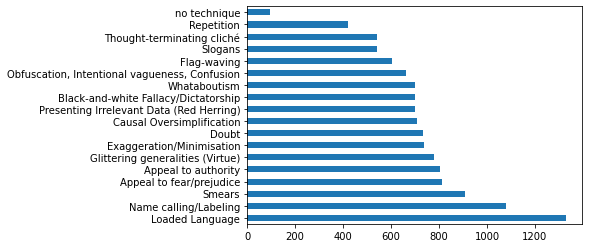

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
x=combinedDF['technique'].value_counts().plot(kind='barh')

In [ ]:
NoTechDF = combinedDF[combinedDF['technique'] == 'no technique']

In [ ]:
NoTechDF

,Unnamed: 0,start,end,technique,text,full_text,id,start_new,end_new,augmented_text,augmented_full_text
0,0,0,0,no technique,NaN,بي بي سي ترندينغ النساء تثرثر كثيرا رئيس أولمب...,1358824915483435012,0.0,0.0,NaN,بي بي سي ترندينغ النساء تثرثر كثيرا رئيس أولمب...
3,3,0,0,no technique,NaN,الرجل الذي كان من فراغ,1364082975428677632,0.0,0.0,NaN,الرجل الذي كان من فراغ
51,51,0,0,no technique,NaN,قهوة الصباح قصيدة في حب الوطن نوف بنت خلفان ال...,1325345970981318656,0.0,0.0,NaN,قهوة الصباح قصيدة في حب الوطن نوف بنت خلفان ال...
58,58,0,0,no technique,NaN,الوصال ما هو معدل عمر الحوت الأحدب السؤال ل هن...,1384110098289594370,0.0,0.0,NaN,الوصال ما هو معدل عمر الحوت الأحدب السؤال ل هن...
60,60,0,0,no technique,NaN,قرادة لرئيس حكومة الوحدة الوطنية لن أخاتلك ترب...,1374002150620213249,0.0,0.0,NaN,قرادة لرئيس حكومة الوحدة الوطنية لن أخاتلك ترب...
...,...,...,...,...,...,...,...,...,...,...,...
971,971,0,0,no technique,NaN,يوم النصر إصرار إنتصار وبناء,1372699741289611264,0.0,0.0,NaN,يوم النصر إصرار إنتصار وبناء
972,972,0,0,no technique,NaN,وتحدث قائلا لايمكن أن تتحمل الدولة المسؤولية و...,1372295109983735816,0.0,0.0,NaN,وتحدث قائلا لايمكن أن تتحمل الدولة المسؤولية و...
998,998,0,0,no technique,NaN,خارج النص ماهي الرواية السائدة التي عارضها فير...,1389776866681114624,0.0,0.0,NaN,خارج النص ماهي الرواية السائدة التي عارضها فير...
999,999,0,0,no technique,NaN,ما هي أول عاصمة عربية ل القهوة في العالم,1400059625441988615,0.0,0.0,NaN,ما هي أول عاصمة عربية ل القهوة في العالم


In [ ]:
from tqdm import tqdm
import numpy as np


def augment_text(df,aug_tech,samples=700,pr=0.1):
    
        if(aug_tech == 1): #Synonym Augmenter
            aug = naw.SynonymAug(aug_src='wordnet', lang='arb')
        elif(aug_tech == 2):  #Contextual Word Embeddings Augmenter with action = 'insert'
            aug = naw.ContextualWordEmbsAug(model_path='bert-base-multilingual-uncased',  action="insert", aug_p=pr)
        elif(aug_tech == 3):#back_translation_aug
          aug = naw.BackTranslationAug(from_model_name='Helsinki-NLP/opus-mt-ar-en', to_model_name='Helsinki-NLP/opus-mt-en-ar')
          

        row_list=[]
        

        ##selecting the minority class samples
        df_n=df.reset_index(drop=True)

        ## data augmentation loop
        for i in tqdm(np.random.randint(0,len(df_n),samples)):
                
                one_row = dict()

                full_text = df_n.iloc[i]['full_text']
                start = df_n.iloc[i]['start']
                end = df_n.iloc[i]['end'] 
                technique = df_n.iloc[i]['technique'] 
                text = df_n.iloc[i]['text'] 
                id = df_n.iloc[i]['id']
                       

                augmented_text = text
                
                augmented_full_text = aug.augment(full_text)
                augmented_full_text = ' '.join(augmented_full_text)
                augmented_full_text = augmented_full_text.strip()
                

                one_row['full_text'] = full_text
                one_row['start'] = start
                one_row['end'] = end
                one_row['technique'] = technique
                one_row['text'] = text
                one_row['id'] = id
                one_row['start_new'] = start
                one_row['end_new'] = end  
                one_row['augmented_text'] = augmented_text
                one_row['augmented_full_text'] = augmented_full_text

                row_list.append(one_row)

          

        ## dataframe
        #df=pd.DataFrame(new_text,columns =['full_text'])
        #df['technique'] = tech
        df=pd.DataFrame(row_list)
        return df
    

In [ ]:
augmented_df = pd.DataFrame()

temp_aug_df = pd.DataFrame()
temp_aug_df = augment_text(NoTechDF,1)
augmented_df = augmented_df.append(temp_aug_df)

print('There are {} rows and {} columns in train'.format(augmented_df.shape[0],augmented_df.shape[1]))    
bool_series = augmented_df.duplicated(subset=['augmented_full_text','technique'], keep = 'first')
print('Boolean series:')
print(bool_series)
print('\n')
print('DataFrame after removing duplicates found in the Name column:')
NoTechDFSynonymAug = augmented_df[~bool_series]
print('There are {} rows and {} columns in train'.format(NoTechDFSynonymAug.shape[0],NoTechDFSynonymAug.shape[1])) 

print(NoTechDFSynonymAug['technique'].value_counts())


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
  0%|          | 0/700 [00:00<?, ?it/s][nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
100%|██████████| 700/700 [00:03<00:00, 191.15it/s]

There are 700 rows and 10 columns in train
Boolean series:
0      False
1      False
2      False
3      False
4      False
       ...  
695     True
696     True
697     True
698     True
699     True
Length: 700, dtype: bool


DataFrame after removing duplicates found in the Name column:
There are 185 rows and 10 columns in train
no technique    185
Name: technique, dtype: int64


In [ ]:
augmented_df = pd.DataFrame()

temp_aug_df = pd.DataFrame()
temp_aug_df = augment_text(NoTechDF,2)
augmented_df = augmented_df.append(temp_aug_df)

print('There are {} rows and {} columns in train'.format(augmented_df.shape[0],augmented_df.shape[1]))    
bool_series = augmented_df.duplicated(subset=['augmented_full_text','technique'], keep = 'first')
print('Boolean series:')
print(bool_series)
print('\n')
print('DataFrame after removing duplicates found in the Name column:')
NoTechDFContexAug = augmented_df[~bool_series]
print('There are {} rows and {} columns in train'.format(NoTechDFContexAug.shape[0],NoTechDFContexAug.shape[1])) 

print(NoTechDFContexAug['technique'].value_counts())

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/872k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/672M [00:00<?, ?B/s]

100%|██████████| 700/700 [11:57<00:00,  1.03s/it]

There are 700 rows and 10 columns in train
Boolean series:
0      False
1      False
2      False
3      False
4      False
       ...  
695    False
696    False
697    False
698    False
699    False
Length: 700, dtype: bool


DataFrame after removing duplicates found in the Name column:
There are 698 rows and 10 columns in train
no technique    698
Name: technique, dtype: int64


In [ ]:
NoTechDFContexAug

,full_text,start,end,technique,text,id,start_new,end_new,augmented_text,augmented_full_text
0,دعوات للتظاهر في الطبقة ضد حملات التجنيد الإجب...,0,0,no technique,NaN,1395120840816140290,0,0,NaN,دعوات الجيش للتظاهر في الطبقة الوسطى ضد حملات ...
1,أحدهما طفل مخلفات القصف والمعارك تودي بحياة شخ...,0,0,no technique,NaN,1363867147454267399,0,0,NaN,احدهما بين طفل مخلفات القصف والمعارك تودي ايضا...
2,هادي عمرو المبعوث الأمريكي للشؤون الفلسطينية و...,0,0,no technique,NaN,1393624062933471235,0,0,NaN,هادي عمرو المبعوث الاعلام الامريكي للشوون الفل...
3,تشيلسي يتوج بكأس دوري أبطال أوروبا للمرة الثان...,0,0,no technique,NaN,7308,0,0,NaN,تشيلسي يتوج بكاس دوري غرب ابطال اوروبا للمرة ا...
4,الكشف عن تطورات صحة فنانة مشهورة بعد إصابتها ب...,0,0,no technique,NaN,1400139104856248323,0,0,NaN,تم الكشف عن تطورات على صحة فنانة مشهورة بعد اص...
...,...,...,...,...,...,...,...,...,...,...
695,رغم فوائده المتعددة تحذير من تناول الزنجبيل في...,0,0,no technique,NaN,1378980729976143876,0,0,NaN,رغم فوايده المتعددة تحذير من تناول الزنجبيل في...
696,من عمان قطافها دانية إصدار أدبي خامس بنكهة طلا...,0,0,no technique,NaN,1360115708181553153,0,0,NaN,من عمان قطافها صحيفة دانية مجلة اصدار ادبي خام...
697,أغلى عسل في العالم يدخل موسوعة غينيس,0,0,no technique,NaN,1374122391513796611,0,0,NaN,اغلى عسل في شرق العالم مما يدخل موسوعة غينيس
698,الرجل الذي كان من فراغ,0,0,no technique,NaN,1364082975428677632,0,0,NaN,الرجل الذي كان من ناحية فراغ


In [ ]:
pdList = [combinedDF, NoTechDFContexAug, NoTechDFSynonymAug]  # List of dataframes
FinalcombinedDF = pd.concat(pdList, axis=0, ignore_index=True)
FinalcombinedDF

,Unnamed: 0,start,end,technique,text,full_text,id,start_new,end_new,augmented_text,augmented_full_text
0,0.0,0,0,no technique,NaN,بي بي سي ترندينغ النساء تثرثر كثيرا رئيس أولمب...,1358824915483435012,0.0,0.0,NaN,بي بي سي ترندينغ النساء تثرثر كثيرا رئيس أولمب...
1,1.0,1,33,Exaggeration/Minimisation,ده مش معتقل ده أحسن من اللوكاندة,ده مش معتقل ده أحسن من اللوكاندة جدل وسخرية من...,1389927866356412416,0.0,32.0,ده مش معتقل ده أحسن من اللوكاندة,ده مش معتقل ده أحسن من اللوكاندة جدل وسخرية من...
2,2.0,37,86,Smears,جدل وسخرية من زيارات تنظمها وزارة الداخلية للسجون,ده مش معتقل ده أحسن من اللوكاندة جدل وسخرية من...,1389927866356412416,33.0,82.0,جدل وسخرية من زيارات تنظمها وزارة الداخلية للسجون,ده مش معتقل ده أحسن من اللوكاندة جدل وسخرية من...
3,3.0,0,0,no technique,NaN,الرجل الذي كان من فراغ,1364082975428677632,0.0,0.0,NaN,الرجل الذي كان من فراغ
4,4.0,60,72,Loaded Language,مجزرة حقيقية,عاجل حركة حماس ما يجري في المسجد الأقصى مجزرة ...,1391667689656102914,40.0,52.0,مجزرة حقيقية,عاجل حركة حماس ما يجري في المسجد الأقصى مجزرة ...
...,...,...,...,...,...,...,...,...,...,...,...
13740,NaN,0,0,no technique,NaN,أحدهما طفل مخلفات القصف والمعارك تودي بحياة شخ...,1363867147454267399,0.0,0.0,NaN,أحدهما طفْل مخلفات القصف والمعارك تودي بحياة ش...
13741,NaN,0,0,no technique,NaN,تابعونا عبر شاشة العربية في نشرة غرينيتش ال بت...,7051,0.0,0.0,NaN,تابعونا عبر شاشة العربية في نشرة غرينيتش ال بت...
13742,NaN,0,0,no technique,NaN,بايدن لرشيدة طليب أدعو الله أن تكون جدتك وعائل...,1394955996523646979,0.0,0.0,NaN,بايدن لرشيدة طليب أدعو الله أن تكون جدتك وعائل...
13743,NaN,0,0,no technique,NaN,نائب رئيس حركة حماس صالح العاروري الاعتداء على...,1391484406536228867,0.0,0.0,NaN,نائب رئيس عمل حماس صالح العاروري الاعتداء على ...


In [ ]:
FinalcombinedDF['augmented_text'] = FinalcombinedDF['augmented_text'].str.strip()
FinalcombinedDF['augmented_full_text'] = FinalcombinedDF['augmented_full_text'].str.strip()

In [ ]:
FinalcombinedDF.shape

(13745, 11)

In [ ]:
FinalcombinedDF.drop_duplicates(subset=['augmented_full_text','technique'],inplace=True)
FinalcombinedDF.shape

(13657, 11)

In [ ]:
FinalcombinedDF['technique'].value_counts()

Loaded Language                                  1330
Name calling/Labeling                            1079
Smears                                            909
no technique                                      890
Appeal to fear/prejudice                          813
Appeal to authority                               803
Glittering generalities (Virtue)                  779
Exaggeration/Minimisation                         739
Doubt                                             733
Causal Oversimplification                         710
Presenting Irrelevant Data (Red Herring)          702
Black-and-white Fallacy/Dictatorship              702
Whataboutism                                      700
Obfuscation, Intentional vagueness, Confusion     662
Flag-waving                                       605
Slogans                                           542
Thought-terminating cliché                        540
Repetition                                        419
Name: technique, dtype: int6

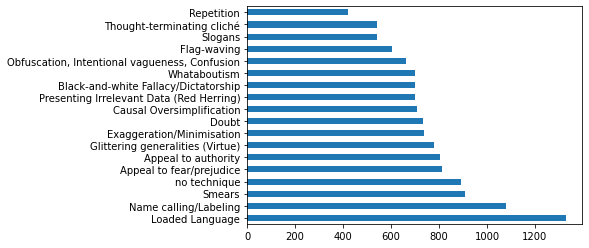

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
x=FinalcombinedDF['technique'].value_counts().plot(kind='barh')

In [ ]:
FinalcombinedDF.drop('upd_start_new', inplace=True, axis=1)
FinalcombinedDF.drop('upd_end_new', inplace=True, axis=1)

In [ ]:
FinalcombinedDF.shape

(13657, 13)

In [ ]:
def reset_start_end(df):
  up_df = df
  for i in range(len(up_df)):
    tech = up_df.loc[i, "technique"]
    if(tech=='no technique'):
      up_df.loc[i,"upd_start_new"] = 0
      up_df.loc[i,"upd_end_new"] = 0
    else:
      full_text = up_df.loc[i,"augmented_full_text"]
      text = up_df.loc[i,"augmented_text"]
      start = full_text.find(text)
      end = start + len(text)
      up_df.loc[i,"upd_start_new"]= start  
      up_df.loc[i,"upd_end_new"] = end 

      return up_df
 

In [ ]:
FinalcombinedDF[(FinalcombinedDF['augmented_text'].isnull()) & (FinalcombinedDF['technique'] != 'no technique')]

,Unnamed: 0,start,end,technique,text,full_text,id,start_new,end_new,augmented_text,augmented_full_text,upd_start_new,upd_end_new


In [ ]:
FinalcombinedDF.loc[541]

index                                                                542
Unnamed: 0                                                         697.0
start                                                                 15
end                                                                   23
technique                                          Name calling/Labeling
text                                                            الاحتلال
full_text              اصابات باقتحام الاحتلال لمخيم عايدة في بيت لحم...
id                                                   1400362027219095552
start_new                                                           15.0
end_new                                                             23.0
augmented_text                                                  الاحتلال
augmented_full_text    اصابات باقتحام الاحتلال لمخيم عايدة في بيت لحم...
upd_start_new                                                        NaN
upd_end_new                                        

In [ ]:
path = '/content/gdrive/MyDrive/Colab Notebooks/propaganda/augResults/FinalcombinedDF.csv'
with open(path, 'w', encoding = 'utf-8') as f:
  FinalcombinedDF.to_csv(f)

In [ ]:
FinalcombinedDF = FinalcombinedDF.drop(FinalcombinedDF[(FinalcombinedDF['augmented_text'].isnull()) & (FinalcombinedDF['technique'] != 'no technique')].index)

In [ ]:
print(FinalcombinedDF.isna().sum())

index                      0
Unnamed: 0               795
start                      0
end                        0
technique                  0
text                     890
full_text                  0
id                         0
start_new                  0
end_new                    0
augmented_text           890
augmented_full_text        0
upd_start_new          13091
upd_end_new            13091
dtype: int64


In [ ]:
for i in range(len(FinalcombinedDF)):

    tech = FinalcombinedDF.loc[i, "technique"]
    
    if(tech=='no technique'):
      FinalcombinedDF.loc[i,"upd_start_new"] = 0
      FinalcombinedDF.loc[i,"upd_end_new"] = 0
    else:
      full_text = FinalcombinedDF.loc[i,"augmented_full_text"]
      text = FinalcombinedDF.loc[i,"augmented_text"]
      start = full_text.find(text)
      end = start + len(text)
      FinalcombinedDF.loc[i,"upd_start_new"]= start  
      FinalcombinedDF.loc[i,"upd_end_new"] = end 

In [ ]:
FinalcombinedDF

,index,Unnamed: 0,start,end,technique,text,full_text,id,start_new,end_new,augmented_text,augmented_full_text,upd_start_new,upd_end_new
0,0,0.0,0,0,no technique,NaN,بي بي سي ترندينغ النساء تثرثر كثيرا رئيس أولمب...,1358824915483435012,0.0,0.0,<NA>,بي بي سي ترندينغ النساء تثرثر كثيرا رئيس أولمب...,0.0,0.0
1,1,1.0,1,33,Exaggeration/Minimisation,ده مش معتقل ده أحسن من اللوكاندة,ده مش معتقل ده أحسن من اللوكاندة جدل وسخرية من...,1389927866356412416,0.0,32.0,ده مش معتقل ده أحسن من اللوكاندة,ده مش معتقل ده أحسن من اللوكاندة جدل وسخرية من...,0.0,32.0
2,2,2.0,37,86,Smears,جدل وسخرية من زيارات تنظمها وزارة الداخلية للسجون,ده مش معتقل ده أحسن من اللوكاندة جدل وسخرية من...,1389927866356412416,33.0,82.0,جدل وسخرية من زيارات تنظمها وزارة الداخلية للسجون,ده مش معتقل ده أحسن من اللوكاندة جدل وسخرية من...,33.0,82.0
3,3,3.0,0,0,no technique,NaN,الرجل الذي كان من فراغ,1364082975428677632,0.0,0.0,<NA>,الرجل الذي كان من فراغ,0.0,0.0
4,4,4.0,60,72,Loaded Language,مجزرة حقيقية,عاجل حركة حماس ما يجري في المسجد الأقصى مجزرة ...,1391667689656102914,40.0,52.0,مجزرة حقيقية,عاجل حركة حماس ما يجري في المسجد الأقصى مجزرة ...,40.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13627,13739,NaN,0,0,no technique,NaN,دعوات للتظاهر في الطبقة ضد حملات التجنيد الإجب...,1395120840816140290,0.0,0.0,<NA>,دعوات للتظاهر في الطبقة ضد حملات التجنيد الإجب...,0.0,0.0
13628,13740,NaN,0,0,no technique,NaN,أحدهما طفل مخلفات القصف والمعارك تودي بحياة شخ...,1363867147454267399,0.0,0.0,<NA>,أحدهما طفْل مخلفات القصف والمعارك تودي بحياة ش...,0.0,0.0
13629,13741,NaN,0,0,no technique,NaN,تابعونا عبر شاشة العربية في نشرة غرينيتش ال بت...,7051,0.0,0.0,<NA>,تابعونا عبر شاشة العربية في نشرة غرينيتش ال بت...,0.0,0.0
13630,13743,NaN,0,0,no technique,NaN,نائب رئيس حركة حماس صالح العاروري الاعتداء على...,1391484406536228867,0.0,0.0,<NA>,نائب رئيس عمل حماس صالح العاروري الاعتداء على ...,0.0,0.0


In [ ]:
path = '/content/gdrive/MyDrive/Colab Notebooks/propaganda/augResults/FinalcombinedDFBefore.csv'
with open(path, 'w', encoding = 'utf-8') as f:
  FinalcombinedDF.to_csv(f)

In [ ]:
display(FinalcombinedDF.dtypes)

index                    int64
Unnamed: 0             float64
start                    int64
end                      int64
technique               object
text                    object
full_text               object
id                       int64
start_new              float64
end_new                float64
augmented_text          string
augmented_full_text     string
upd_start_new          float64
upd_end_new            float64
dtype: object

In [ ]:
FinalcombinedDF['start'] = FinalcombinedDF['upd_start_new']
FinalcombinedDF['end'] = FinalcombinedDF['upd_end_new']
FinalcombinedDF['text'] = FinalcombinedDF['augmented_text']
FinalcombinedDF['full_text'] = FinalcombinedDF['augmented_full_text']


In [ ]:
FinalcombinedDF.drop('Unnamed: 0', inplace=True, axis=1)
FinalcombinedDF.drop('start_new', inplace=True, axis=1)
FinalcombinedDF.drop('end_new', inplace=True, axis=1)
FinalcombinedDF.drop('augmented_text', inplace=True, axis=1)
FinalcombinedDF.drop('augmented_full_text', inplace=True, axis=1)
FinalcombinedDF.drop('upd_start_new', inplace=True, axis=1)
FinalcombinedDF.drop('upd_end_new', inplace=True, axis=1)

In [ ]:
FinalcombinedDF

,index,start,end,technique,text,full_text,id
0,0,0.0,0.0,no technique,<NA>,بي بي سي ترندينغ النساء تثرثر كثيرا رئيس أولمب...,1358824915483435012
1,1,0.0,32.0,Exaggeration/Minimisation,ده مش معتقل ده أحسن من اللوكاندة,ده مش معتقل ده أحسن من اللوكاندة جدل وسخرية من...,1389927866356412416
2,2,33.0,82.0,Smears,جدل وسخرية من زيارات تنظمها وزارة الداخلية للسجون,ده مش معتقل ده أحسن من اللوكاندة جدل وسخرية من...,1389927866356412416
3,3,0.0,0.0,no technique,<NA>,الرجل الذي كان من فراغ,1364082975428677632
4,4,40.0,52.0,Loaded Language,مجزرة حقيقية,عاجل حركة حماس ما يجري في المسجد الأقصى مجزرة ...,1391667689656102914
...,...,...,...,...,...,...,...
13627,13739,0.0,0.0,no technique,<NA>,دعوات للتظاهر في الطبقة ضد حملات التجنيد الإجب...,1395120840816140290
13628,13740,0.0,0.0,no technique,<NA>,أحدهما طفْل مخلفات القصف والمعارك تودي بحياة ش...,1363867147454267399
13629,13741,0.0,0.0,no technique,<NA>,تابعونا عبر شاشة العربية في نشرة غرينيتش ال بت...,7051
13630,13743,0.0,0.0,no technique,<NA>,نائب رئيس عمل حماس صالح العاروري الاعتداء على ...,1391484406536228867


In [ ]:
FinalcombinedDF['augmented_text'] = FinalcombinedDF['augmented_text'].astype("string")
FinalcombinedDF['augmented_full_text'] = FinalcombinedDF['augmented_full_text'].astype("string")

In [ ]:
path = '/content/gdrive/MyDrive/Colab Notebooks/propaganda/augResults/FinalcombinedDF.csv'
with open(path, 'w', encoding = 'utf-8') as f:
  FinalcombinedDF.to_csv(f)

In [ ]:
FinalcombinedDF.sort_values(by=['technique','full_text'],inplace=True, na_position='last')
FinalcombinedDF

,index,start,end,technique,text,full_text,id
9177,9178,0.0,98.0,Appeal to authority,in موسكو البنتاغون تجاوز الحد من المسموح الا ب...,in موسكو البنتاغون تجاوز الحد من المسموح الا ب...,7102
8724,8725,0.0,65.0,Appeal to authority,« لجنة تصنيف الرقابة الروسية لا تستبعد ابطاء ا...,« لجنة تصنيف الرقابة الروسية لا تستبعد ابطاء ا...,7336
8857,8858,0.0,198.0,Appeal to authority,» النايب في البرلمان الاردني اسامة ناصر العجار...,» النايب في البرلمان الاردني اسامة ناصر العجار...,7116
9171,9172,0.0,191.0,Appeal to authority,، الكاتب الصحفي اشرف العشري في جهد مصري سعودي ...,، الكاتب الصحفي اشرف العشري في جهد مصري سعودي ...,7053
135,135,0.0,157.0,Appeal to authority,أستاذ العلاقات الدولية سالم اليامي السعودية وا...,أستاذ العلاقات الدولية سالم اليامي السعودية وا...,7054
...,...,...,...,...,...,...,...
758,759,0.0,0.0,no technique,<NA>,يوم النصر إصرار إنتصار وبناء,1372699741289611264
13024,13049,0.0,0.0,no technique,<NA>,يوم النصر اصرار علي انتصار المانيا وبناء,1372699741289611264
13298,13323,0.0,0.0,no technique,<NA>,يوم النصر اكتوبر اصرار انتصار فرنسا وبناء,1372699741289611264
13034,13059,0.0,0.0,no technique,<NA>,يوم اول النصر يوم اصرار انتصار وبناء,1372699741289611264


In [ ]:
print(FinalcombinedDF.shape)


(13632, 7)


In [ ]:
FinalcombinedDF['technique'].value_counts()

Loaded Language                                  1309
Name calling/Labeling                            1076
Smears                                            909
no technique                                      890
Appeal to fear/prejudice                          813
Appeal to authority                               803
Glittering generalities (Virtue)                  779
Exaggeration/Minimisation                         739
Doubt                                             733
Causal Oversimplification                         710
Presenting Irrelevant Data (Red Herring)          702
Black-and-white Fallacy/Dictatorship              702
Whataboutism                                      700
Obfuscation, Intentional vagueness, Confusion     662
Flag-waving                                       605
Slogans                                           542
Thought-terminating cliché                        540
Repetition                                        418
Name: technique, dtype: int6

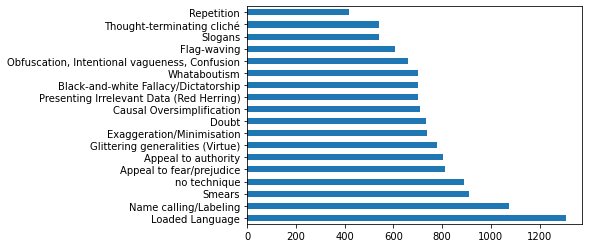

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
x=FinalcombinedDF['technique'].value_counts().plot(kind='barh')

In [ ]:
display(FinalcombinedDF.dtypes)

index          int64
start        float64
end          float64
technique     object
text          string
full_text     string
id             int64
dtype: object